# **STUDENT AI** - FEATURE ENGINEERING

## Objectives

Ensure the dataset is in the correct format and configuration for passing into ML pipeline while optimizing model accuracy. This step will be required if the liner regression model does not meet the business requirement accuracy. In that case a classification model might be neccessary in which case balanced data is essential.
This will include encoding categorical variables as well as balancing the data.

## Inputs

Continues to assess dataset loaded in previous notebook.

## Outputs

Saves a new balanced dataset


---

# Import required libraries

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.encoding import OrdinalEncoder
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.model_selection import train_test_split

print('All Libraries Loaded')

# set default diagram size for matplotlib
plt.rcParams['figure.figsize'] = [3, 3]
colors = ['red', 'green', 'blue', 'orange', 'purple','yellow']

All Libraries Loaded


# Change working directory

### Set the working directory to notebook parent folder
If the output does not match, click **'clear all outputs'** and then **'restart'** the notebook. 
Then run cells from top to bottom.

In [2]:
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print('If correct, Active Directory should read: /workspace/student-AI')
print(f"Active Directory: {current_dir}")

If correct, Active Directory should read: /workspace/student-AI
Active Directory: /workspace/student-AI


### Plot column distribution function

In [18]:
# define custom function to plot categorical variables based on column name
def plot_category_distribution(column):
    distribution = df[column].value_counts()
    distribution.plot(kind='bar', color=colors)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

### Load cleaned dataset

In [21]:
df = pd.read_csv(f"outputs/dataset/Expanded_data_with_more_features_clean.csv")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,76,78,75


In [20]:
columns_to_drop = ['ParentMaritalStatus', 'PracticeSport', 'IsFirstChild','NrSiblings','WklyStudyHours']
df_dropped = df.drop(columns=columns_to_drop, axis=1)
df_dropped.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,71,71,74
1,female,group C,some college,standard,none,69,90,88
2,female,group B,master's degree,standard,none,87,93,91
3,male,group A,associate's degree,free/reduced,none,45,56,42
4,male,group C,some college,standard,none,76,78,75


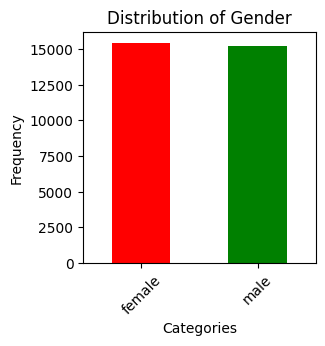

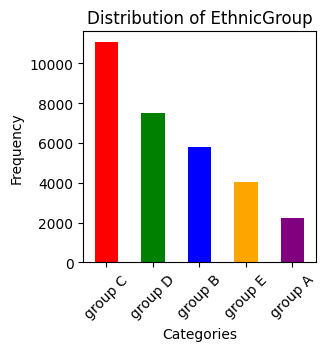

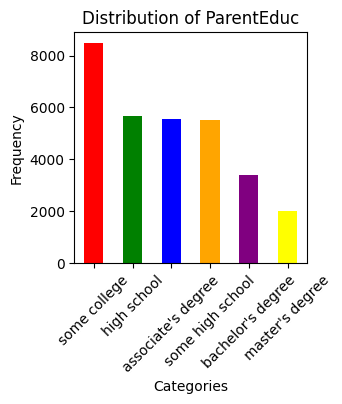

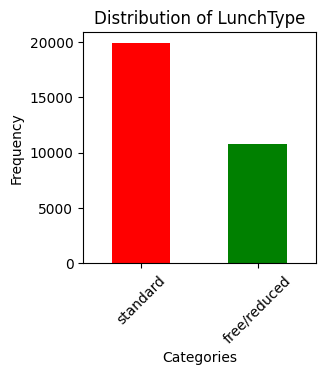

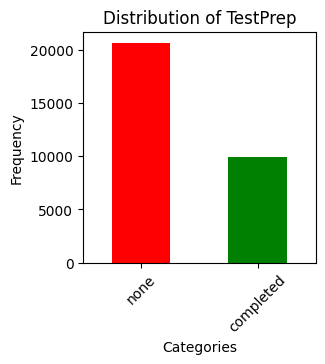

In [23]:
column_list = ['Gender','EthnicGroup','ParentEduc','LunchType','TestPrep']

for column in column_list:
    plot_category_distribution(column)